In [ ]:
!pip install --upgrade pip
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-rto4k2r1
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-rto4k2r1
  Resolved https://github.com/google/lightweight_mmm.git to commit 4406aaa77bddc5b0d73d31c6cf4f2ace03f3ffda
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 23.3 MB/s eta 0:00:00
  Created wheel for lightweight-mmm: filename=lightweight_mmm-0.1.9-py3-none-any.whl size=105532 sha256=f28bc3ac234a32866f8a894ee8664bedfcd262b37b6b9f390d5d279f1633a51c
  St

In [ ]:
import pandas as pd
from lightweight_mmm import preprocessing, lightweight_mmm, plot, optimize_media
import jax.numpy as jnp
from sklearn.metrics import mean_absolute_percentage_error
import jax.numpy as jnp
import numpyro
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [ ]:
ins_data = pd.read_csv("/content/instagram_processed_data.csv", usecols=["Impressions", "Reach", "Engaged Users", "Fan Growth", "Views", "Cost", "Consideration", "Awareness", "Engagement"])

In [ ]:
yt_data = pd.read_csv("/content/youtube_processed_data.csv", usecols=["Impressions", "Reach", "Engaged Users", "Fan Growth", "Views", "Cost", "Consideration", "Awareness", "Engagement"])

In [ ]:
fb_data = pd.read_csv("/content/facebook_processed_data.csv", usecols=["Lifetime Post Total Impressions", "Reach", "Engaged Users", "Fan Growth", "Views", "Cost", "Consideration", "Awareness", "Engagement"])

In [ ]:
ins_data = ins_data[:398]

In [ ]:
yt_data = yt_data[:398]

In [ ]:
simulated_sales_data = utils.simulate_dummy_data(
    data_size=398,
    n_media_channels=3,
 n_extra_features=6)

In [ ]:
sales_data = simulated_sales_data[2]

In [ ]:
sales_data.shape

(398,)

In [ ]:
### Awareness as media data ###
# ins_media_data = ins_data[["Awareness"]]

# fb_media_data = fb_data[["Awareness"]]

# yt_media_data = yt_data[["Awareness"]]

# ins_cost_data = ins_data[["Cost"]]

# fb_cost_data = fb_data[["Cost"]]

# yt_cost_data = yt_data[["Cost"]]

# ins_extra_features_data = ins_data[["Engagement", "Consideration"]]

# fb_extra_features_data = fb_data[["Engagement", "Consideration"]]

# yt_extra_features_data = yt_data[["Engagement", "Consideration"]]

# ### Engagement as media data
# ins_media_data = ins_data[["Engagement"]]

# fb_media_data = fb_data[["Engagement"]]

# yt_media_data = yt_data[["Engagement"]]

# ins_cost_data = ins_data[["Cost"]]

# fb_cost_data = fb_data[["Cost"]]

# yt_cost_data = yt_data[["Cost"]]

# ins_extra_features_data = ins_data[["Awareness", "Consideration"]]

# fb_extra_features_data = fb_data[["Awareness", "Consideration"]]

# yt_extra_features_data = yt_data[["Awareness", "Consideration"]]


### Consideration as media data
ins_media_data = ins_data[["Consideration"]]

fb_media_data = fb_data[["Consideration"]]

yt_media_data = yt_data[["Consideration"]]

ins_cost_data = ins_data[["Cost"]]

fb_cost_data = fb_data[["Cost"]]

yt_cost_data = yt_data[["Cost"]]

ins_extra_features_data = ins_data[["Awareness", "Engagement"]]

fb_extra_features_data = fb_data[["Awareness", "Engagement"]]

yt_extra_features_data = yt_data[["Awareness", "Engagement"]]

In [ ]:
len(ins_media_data)

398

In [ ]:
# Reset index if the dataframes do not align properly
ins_media_data.reset_index(drop=True, inplace=True)
fb_media_data.reset_index(drop=True, inplace=True)
yt_media_data.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
across_platform_media_data_df = pd.concat([fb_media_data, ins_media_data, yt_media_data], axis=1)
across_platform_media_data_df.columns = ['fb_media_data', 'ins_media_data', 'yt_media_data']

In [ ]:
across_platform_media_data = across_platform_media_data_df.to_numpy()

In [ ]:
across_platform_media_data

array([[8.66624038e+02, 2.26304579e-03, 4.68694275e-01],
       [9.74774775e+02, 2.18517012e-01, 9.21503317e-02],
       [9.83464906e+02, 3.39818197e-03, 2.66840776e-01],
       ...,
       [9.88438497e+02, 2.59624413e-01, 0.00000000e+00],
       [9.76989079e+02, 0.00000000e+00, 0.00000000e+00],
       [9.78405068e+02, 3.03448276e-01, 0.00000000e+00]])

In [ ]:
import numpy as np

# Calculate the mean of each column in media_data_train_scaled
column_means = np.mean(across_platform_media_data, axis=0)

# Replace negative values in each column with the corresponding mean
for i in range(across_platform_media_data.shape[1]):
    negative_indices = np.where(across_platform_media_data[:, i] <= 0)[0]
    across_platform_media_data[negative_indices, i] = column_means[i]

# Find the indices of negative values in media_data_train_scaled
negative_indices = np.where(across_platform_media_data <= 0)[0]

# Count the number of negative values
num_negative_values = len(negative_indices)

# Get the actual negative values
negative_values = across_platform_media_data[negative_indices]

# Print the results
print(f"Number of negative values: {num_negative_values}")
print(f"Negative values: {negative_values}")
print(f"Indices of negative values: {negative_indices}")

Number of negative values: 0
Negative values: []
Indices of negative values: []


In [ ]:
# Reset index if the dataframes do not align properly
ins_cost_data = ins_cost_data.sum(axis=0)
fb_cost_data = fb_cost_data.sum(axis=0)
yt_cost_data = yt_cost_data.sum(axis=0)

In [ ]:
import numpy as np
across_platform_cost_data = np.concatenate([fb_cost_data, ins_cost_data, yt_cost_data], axis=0)

In [ ]:
across_platform_cost_data

array([340847.055,  10589.634, 329754.832])

In [ ]:
# ### Awareness as media data
# # Reset index if the dataframes do not align properly
# ins_extra_features_data.reset_index(drop=True, inplace=True)
# fb_extra_features_data.reset_index(drop=True, inplace=True)
# yt_extra_features_data.reset_index(drop=True, inplace=True)

# # Concatenate and rename columns
# across_platform_extra_features_data_df = pd.concat([fb_extra_features_data, ins_extra_features_data, yt_extra_features_data], axis=1)
# across_platform_extra_features_data_df.columns = ['fb_engagement_data', 'fb_consideration_data','ins_engagement_data', 'ins_consideration_data','yt_engagement_data', 'yt_consideration_data']

# ### Engagement as media data
# # Reset index if the dataframes do not align properly
# ins_extra_features_data.reset_index(drop=True, inplace=True)
# fb_extra_features_data.reset_index(drop=True, inplace=True)
# yt_extra_features_data.reset_index(drop=True, inplace=True)

# # Concatenate and rename columns
# across_platform_extra_features_data_df = pd.concat([fb_extra_features_data, ins_extra_features_data, yt_extra_features_data], axis=1)
# across_platform_extra_features_data_df.columns = ['fb_awareness_data', 'fb_consideration_data','ins_awareness_data', 'ins_consideration_data','yt_awareness_data', 'yt_consideration_data']

### Consideration as media data
# Reset index if the dataframes do not align properly
ins_extra_features_data.reset_index(drop=True, inplace=True)
fb_extra_features_data.reset_index(drop=True, inplace=True)
yt_extra_features_data.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
across_platform_extra_features_data_df = pd.concat([fb_extra_features_data, ins_extra_features_data, yt_extra_features_data], axis=1)
across_platform_extra_features_data_df.columns = ['fb_awareness_data', 'fb_engagement_data','ins_awareness_data', 'ins_engagement_data','yt_awareness_data', 'yt_engagement_data']

In [ ]:
across_platform_extra_features_data = across_platform_extra_features_data_df.to_numpy()
across_platform_extra_features_data

array([[4.30940044e+01, 2.22352533e+01, 1.54218466e-03, 4.33484750e-02,
        9.73022125e-01, 7.07920550e-01],
       [1.23692284e+01, 1.90320991e+02, 3.02893937e-03, 2.32830710e-01,
        9.87853948e-01, 2.31245172e-01],
       [1.87750669e+01, 2.03408181e+01, 2.41654096e-03, 3.64267830e-02,
        9.92289699e-01, 5.90456184e-01],
       ...,
       [2.14783652e+01, 7.31838560e+01, 4.37280795e-04, 2.74214378e-01,
        9.88533017e-01, 1.48809524e-01],
       [1.47180967e+01, 1.59163213e+02, 3.74254878e-04, 3.20284698e-02,
        9.35851625e-01, 2.47524752e-01],
       [1.22090708e+01, 3.21809991e-01, 4.46519122e-04, 3.05555556e-01,
        8.98957210e-01, 0.00000000e+00]])

In [ ]:
import numpy as jnp
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(missing_values=jnp.nan, strategy="mean")

# Impute missing values
sales_data = imputer.fit_transform(sales_data.reshape(-1, 1)).ravel()

In [ ]:
# sales_data_reshaped = sales_data.reshape(-1, 1)

In [ ]:
media_data_train = across_platform_media_data[:300]
media_data_test = across_platform_media_data[300:]
target_data_train = sales_data[:300]
target_data_test = sales_data[300:]
cost_data_train = across_platform_cost_data
extra_features_data_train = across_platform_extra_features_data[:300]
extra_features_data_test = across_platform_extra_features_data[300:]

In [ ]:
cost_data_train

array([340847.055,  10589.634, 329754.832])

In [ ]:
media_data_train.shape

(300, 3)

In [ ]:
target_data_train.shape

(300,)

In [ ]:
extra_features_data_train.shape

(300, 6)

In [ ]:
target_data_test

array([61.470127, 60.660053, 53.97658 , 56.633793, 52.36595 , 61.91593 ,
       59.569275, 58.493446, 55.119194, 55.516895, 54.93929 , 53.529747,
       53.661823, 54.71984 , 57.237732, 55.669346, 56.918304, 62.192844,
       59.12359 , 59.528374, 53.398582, 56.40074 , 48.92091 , 53.624146,
       52.353966, 63.97618 , 62.08432 , 55.334114, 58.546165, 55.067196,
       56.98752 , 54.088173, 56.818558, 52.161377, 59.771378, 56.32337 ,
       58.688442, 56.945946, 55.404118, 57.014557, 55.307266, 63.125576,
       63.82434 , 62.58509 , 60.492607, 59.85983 , 57.90101 , 55.63504 ,
       59.192104, 56.643593, 56.30078 , 51.735153, 56.37173 , 56.92965 ,
       56.44593 , 59.666542, 56.542812, 49.992493, 47.060734, 51.21363 ,
       57.647453, 59.631794, 59.59836 , 53.89454 , 58.848797, 61.110523,
       61.47135 , 62.564064, 61.638577, 63.509495, 59.042656, 59.65177 ,
       54.804752, 51.57428 , 52.60222 , 56.23184 , 61.363327, 63.227478,
       54.31773 , 52.25317 , 60.13107 , 58.065434, 

In [ ]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(
    divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

In [ ]:
media_data_train_scaled = media_scaler.fit_transform(media_data_train)
target_train_scaled = target_scaler.fit_transform(target_data_train)
# target_train_scaled1 = target_scaler.fit_transform(target_data_train1)
costs_scaled = cost_scaler.fit_transform(cost_data_train)
extra_features_scaled = extra_features_scaler.fit_transform(extra_features_data_train)

media_data_test_scaled = media_scaler.transform(media_data_test)
extra_features_test_scaled = extra_features_scaler.fit_transform(extra_features_data_test)

In [ ]:
target_data_test

array([61.470127, 60.660053, 53.97658 , 56.633793, 52.36595 , 61.91593 ,
       59.569275, 58.493446, 55.119194, 55.516895, 54.93929 , 53.529747,
       53.661823, 54.71984 , 57.237732, 55.669346, 56.918304, 62.192844,
       59.12359 , 59.528374, 53.398582, 56.40074 , 48.92091 , 53.624146,
       52.353966, 63.97618 , 62.08432 , 55.334114, 58.546165, 55.067196,
       56.98752 , 54.088173, 56.818558, 52.161377, 59.771378, 56.32337 ,
       58.688442, 56.945946, 55.404118, 57.014557, 55.307266, 63.125576,
       63.82434 , 62.58509 , 60.492607, 59.85983 , 57.90101 , 55.63504 ,
       59.192104, 56.643593, 56.30078 , 51.735153, 56.37173 , 56.92965 ,
       56.44593 , 59.666542, 56.542812, 49.992493, 47.060734, 51.21363 ,
       57.647453, 59.631794, 59.59836 , 53.89454 , 58.848797, 61.110523,
       61.47135 , 62.564064, 61.638577, 63.509495, 59.042656, 59.65177 ,
       54.804752, 51.57428 , 52.60222 , 56.23184 , 61.363327, 63.227478,
       54.31773 , 52.25317 , 60.13107 , 58.065434, 

In [ ]:
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist

loc=extra_features_scaled
scale=jnp.std(extra_features_scaled)
#print("loc values:", loc)
# Ensure there are no NaNs or infinite values
assert jnp.all(jnp.isfinite(loc)), "loc contains non-finite values!"
assert jnp.all(jnp.isfinite(scale)), "scale contains non-finite values!"

# Creating a Normal distribution with valid parameters
try:
    normal_dist = dist.Normal(loc, scale)
    print("Normal distribution created successfully.")
except ValueError as e:
    print(f"Error creating Normal distribution: {e}")

Normal distribution created successfully.


In [ ]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [ ]:
# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.
mmm.fit(
    media=media_data_train_scaled,
    media_prior=costs_scaled,
    target=target_train_scaled,
    extra_features=extra_features_scaled,
    number_warmup=1000,
    number_samples=1000,
    seed=1)

/usr/local/lib/python3.10/dist-packages/lightweight_mmm/lightweight_mmm.py:359: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 2000/2000 [02:53<00:00, 11.55it/s, 255 steps of size 1.30e-02. acc. prob=0.49]


In [ ]:
adstock_models = ["adstock", "hill_adstock", "carryover"]
degrees_season = [1,2,3]

#adstock_models = ["hill_adstock"]
#degrees_season = [1]


for model_name in adstock_models:
    for degrees in degrees_season:
        mmm = lightweight_mmm.LightweightMMM(model_name=model_name)
        mmm.fit(media=media_data_train_scaled,
                media_prior=costs_scaled,
                target=target_train_scaled,
                extra_features=extra_features_scaled,
                number_warmup=1000,
                number_samples=1000,
                number_chains=1,

                seed=1)

        prediction = mmm.predict(
        media=media_data_test_scaled,
        extra_features=extra_features_test_scaled,
        target_scaler=target_scaler,
        seed=1)
        p = prediction.mean(axis=0)

        # p = p.at[jnp.isnan(p)].set(jnp.nanmean(p))

        p = np.where(np.isinf(p), np.nan, p)

        # Calculate the mean value of the array, ignoring NaN values
        mean_value = np.nanmean(p)

        # Replace NaN values with the mean value
        p = np.where(np.isnan(p), mean_value, p)

        print(target_data_test)

        print(p)

        mape = mean_absolute_percentage_error(target_data_test, p)
        print(f"model_name={model_name} degrees={degrees} MAPE={mape} samples={p[:3]}")

sample: 100%|██████████| 2000/2000 [01:30<00:00, 22.19it/s, 1023 steps of size 5.86e-03. acc. prob=0.87]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.937

sample: 100%|██████████| 2000/2000 [01:30<00:00, 22.05it/s, 1023 steps of size 5.86e-03. acc. prob=0.87]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.937

sample: 100%|██████████| 2000/2000 [01:33<00:00, 21.47it/s, 1023 steps of size 5.86e-03. acc. prob=0.87]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.937

sample: 100%|██████████| 2000/2000 [01:40<00:00, 19.84it/s, 383 steps of size 7.41e-03. acc. prob=0.83]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.807

sample: 100%|██████████| 2000/2000 [01:40<00:00, 19.94it/s, 383 steps of size 7.41e-03. acc. prob=0.83]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.807

sample: 100%|██████████| 2000/2000 [01:40<00:00, 19.91it/s, 383 steps of size 7.41e-03. acc. prob=0.83]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.807

sample: 100%|██████████| 2000/2000 [03:40<00:00,  9.07it/s, 255 steps of size 1.26e-02. acc. prob=0.91]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.856

sample: 100%|██████████| 2000/2000 [03:35<00:00,  9.28it/s, 255 steps of size 1.26e-02. acc. prob=0.91]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.856

sample: 100%|██████████| 2000/2000 [03:35<00:00,  9.26it/s, 255 steps of size 1.26e-02. acc. prob=0.91]


[61.470127 60.660053 53.97658  56.633793 52.36595  61.91593  59.569275
 58.493446 55.119194 55.516895 54.93929  53.529747 53.661823 54.71984
 57.237732 55.669346 56.918304 62.192844 59.12359  59.528374 53.398582
 56.40074  48.92091  53.624146 52.353966 63.97618  62.08432  55.334114
 58.546165 55.067196 56.98752  54.088173 56.818558 52.161377 59.771378
 56.32337  58.688442 56.945946 55.404118 57.014557 55.307266 63.125576
 63.82434  62.58509  60.492607 59.85983  57.90101  55.63504  59.192104
 56.643593 56.30078  51.735153 56.37173  56.92965  56.44593  59.666542
 56.542812 49.992493 47.060734 51.21363  57.647453 59.631794 59.59836
 53.89454  58.848797 61.110523 61.47135  62.564064 61.638577 63.509495
 59.042656 59.65177  54.804752 51.57428  52.60222  56.23184  61.363327
 63.227478 54.31773  52.25317  60.13107  58.065434 56.777836 56.482136
 55.418144 58.262478 61.689117 60.36579  57.160065 50.76169  55.541805
 60.46793  58.57937  59.6665   58.21598  55.6824   56.073727 58.811096]
[58.856

In [ ]:
target_data_test

array([61.470127, 60.660053, 53.97658 , 56.633793, 52.36595 , 61.91593 ,
       59.569275, 58.493446, 55.119194, 55.516895, 54.93929 , 53.529747,
       53.661823, 54.71984 , 57.237732, 55.669346, 56.918304, 62.192844,
       59.12359 , 59.528374, 53.398582, 56.40074 , 48.92091 , 53.624146,
       52.353966, 63.97618 , 62.08432 , 55.334114, 58.546165, 55.067196,
       56.98752 , 54.088173, 56.818558, 52.161377, 59.771378, 56.32337 ,
       58.688442, 56.945946, 55.404118, 57.014557, 55.307266, 63.125576,
       63.82434 , 62.58509 , 60.492607, 59.85983 , 57.90101 , 55.63504 ,
       59.192104, 56.643593, 56.30078 , 51.735153, 56.37173 , 56.92965 ,
       56.44593 , 59.666542, 56.542812, 49.992493, 47.060734, 51.21363 ,
       57.647453, 59.631794, 59.59836 , 53.89454 , 58.848797, 61.110523,
       61.47135 , 62.564064, 61.638577, 63.509495, 59.042656, 59.65177 ,
       54.804752, 51.57428 , 52.60222 , 56.23184 , 61.363327, 63.227478,
       54.31773 , 52.25317 , 60.13107 , 58.065434, 

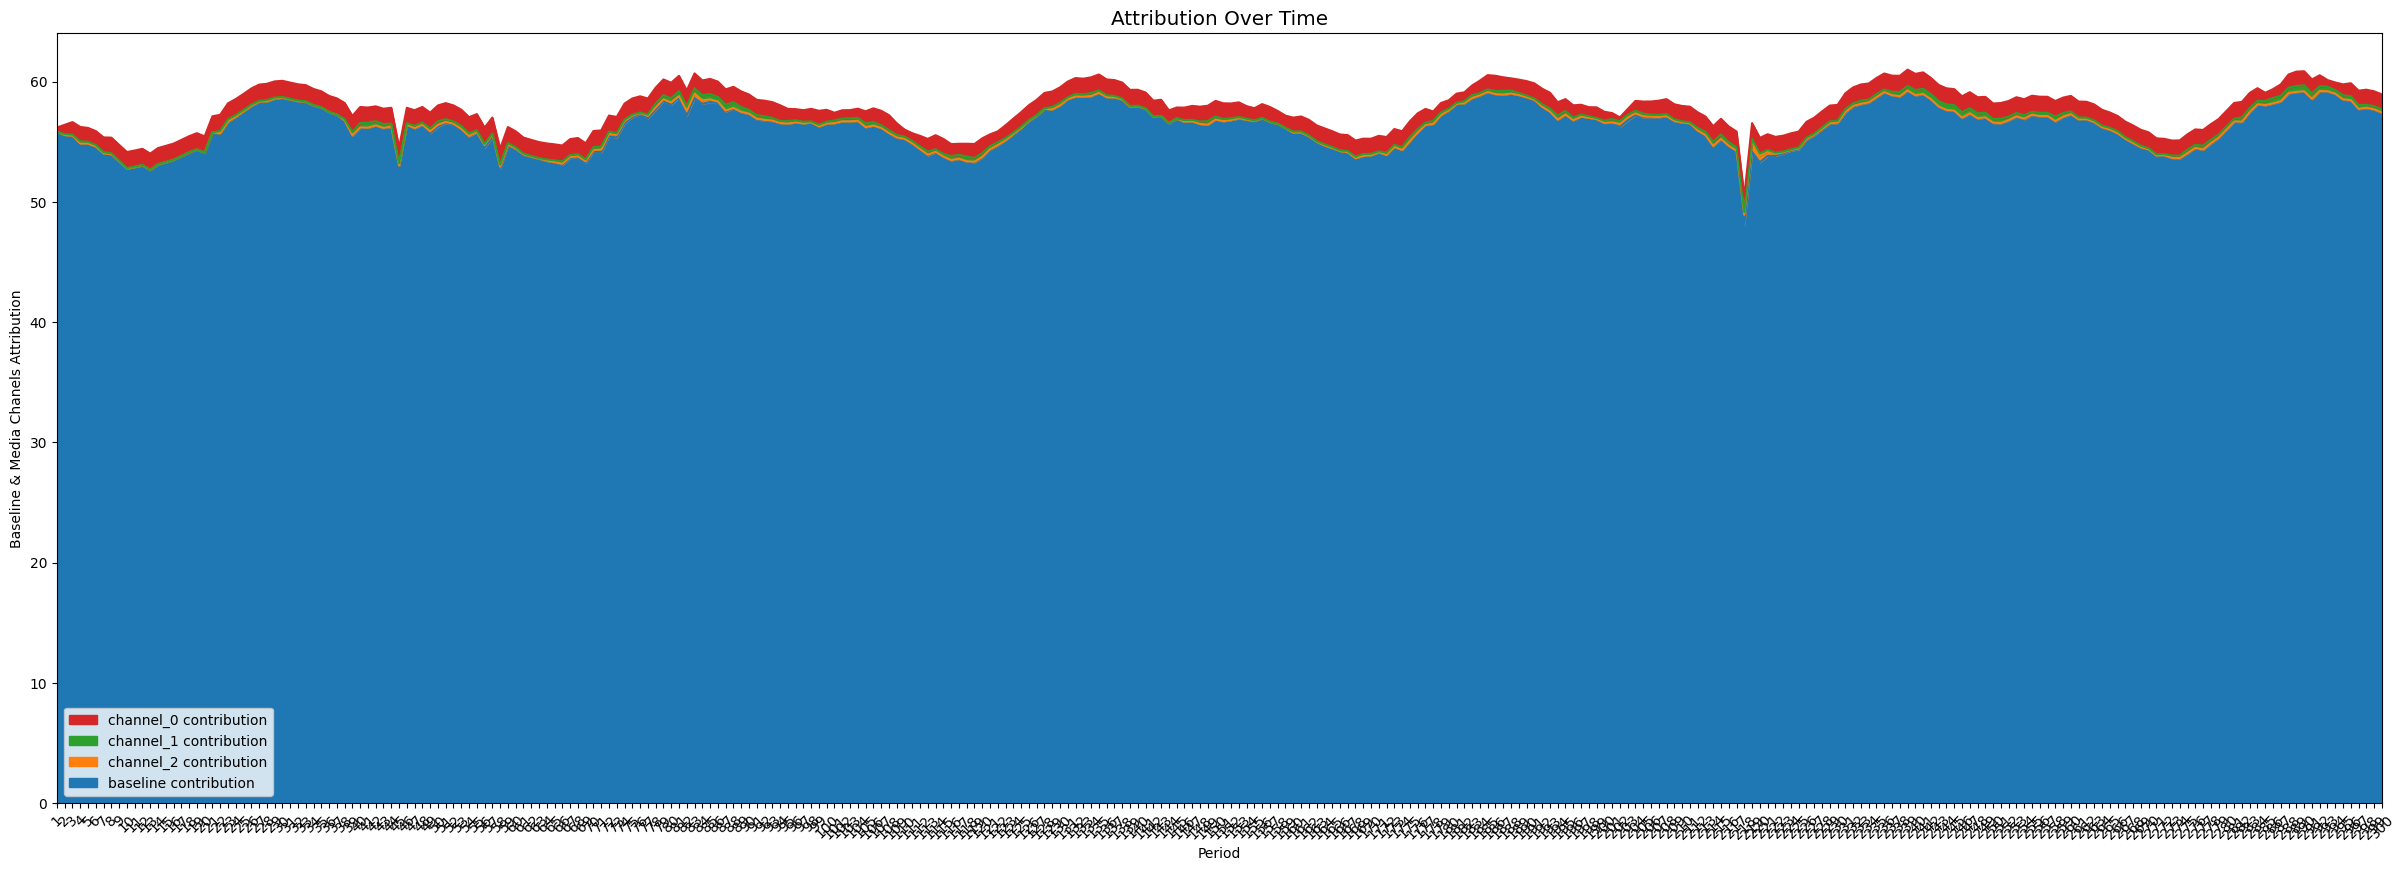

In [ ]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

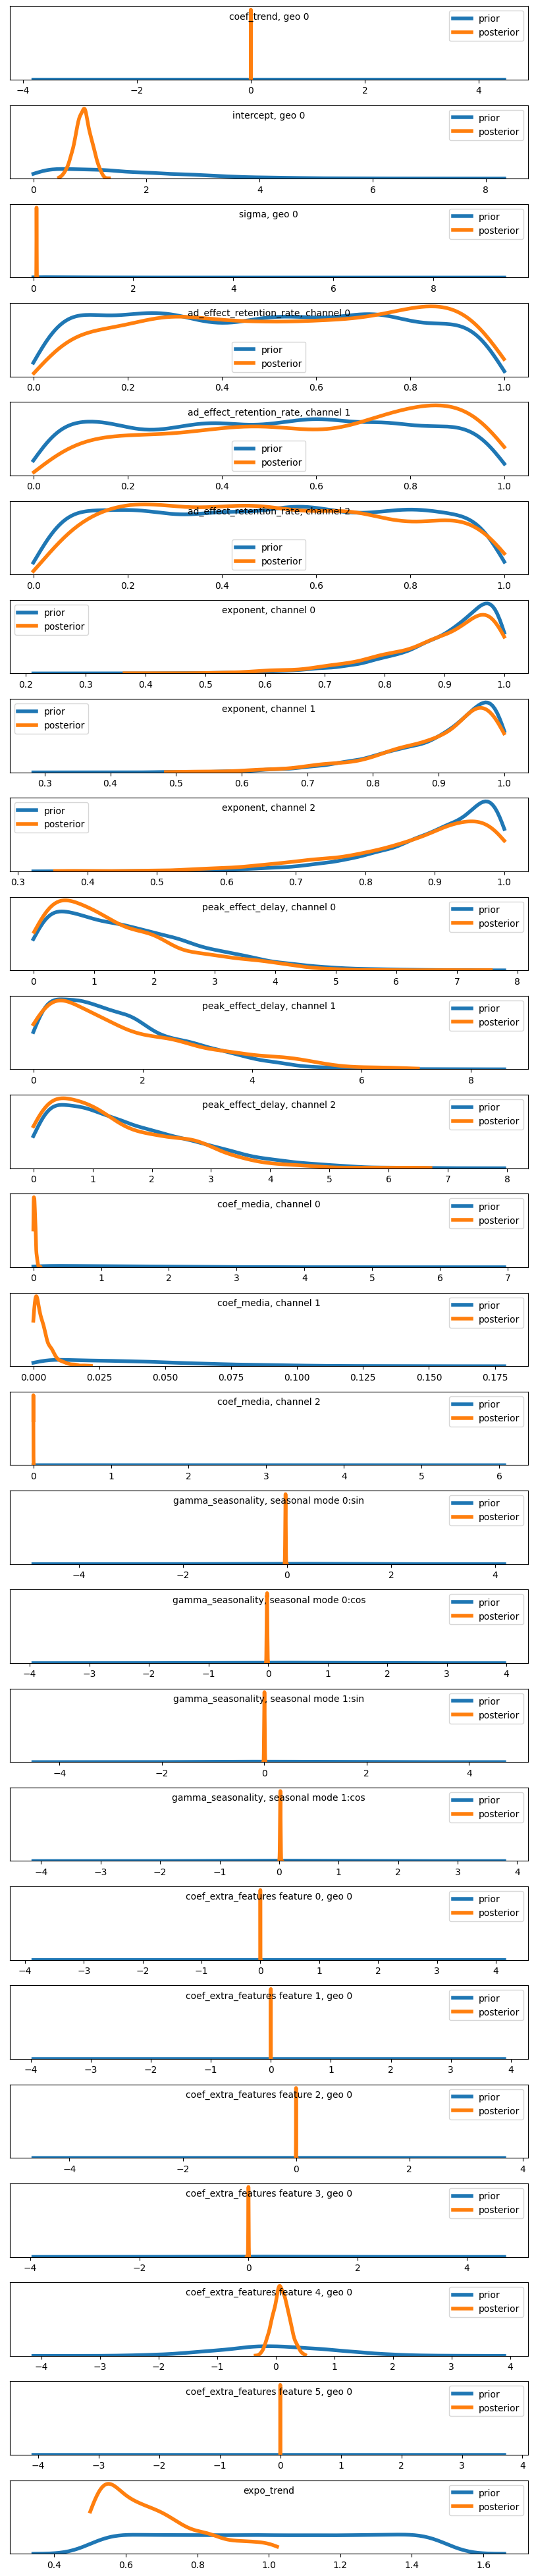

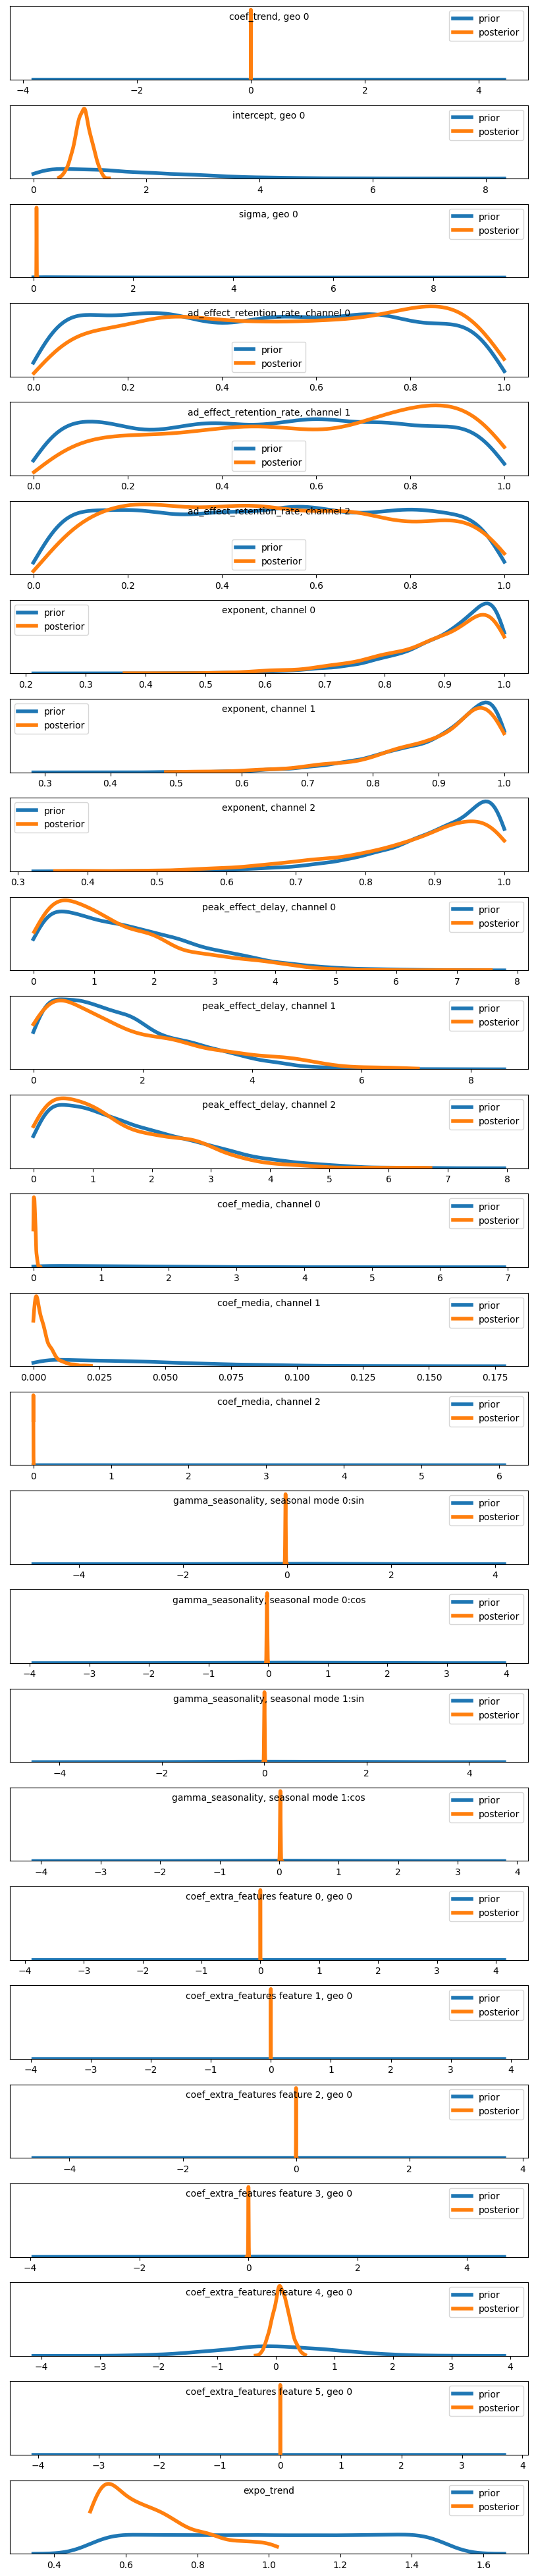

In [ ]:
plot.plot_prior_and_posterior(media_mix_model=mmm)

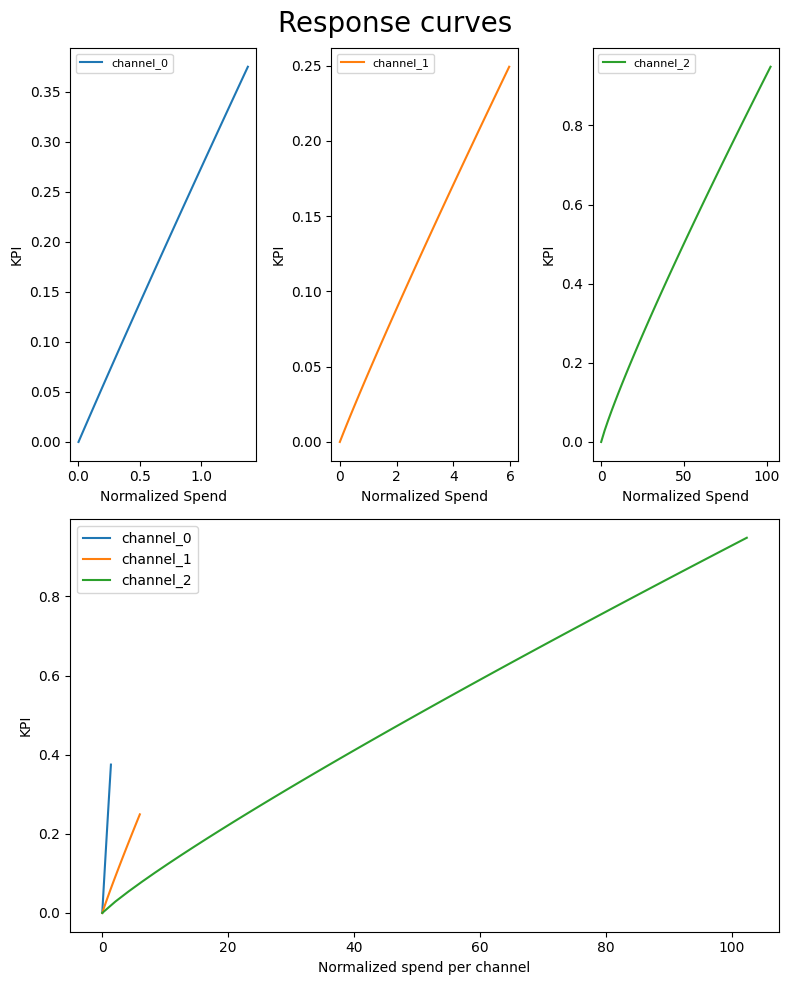

In [ ]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler, seed=1)

In [ ]:
prices = jnp.ones(mmm.n_media_channels)

In [ ]:
n_time_periods = 10
budget = jnp.sum(jnp.dot(prices, across_platform_media_data.mean(axis=0)))* n_time_periods

In [ ]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_data_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -585.6451360803176
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8


In [ ]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([8.8007559e+03, 1.9666069e+00, 6.3272041e+01], dtype=float32)

In [ ]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([8.8110234e+03, 1.6570820e+00, 5.3313637e+01], dtype=float32)

In [ ]:
budget, optimal_buget_allocation.sum()

(Array(8865.994, dtype=float32), Array(8865.995, dtype=float32))

In [ ]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(8865.994, dtype=float32), Array(8865.995, dtype=float32))

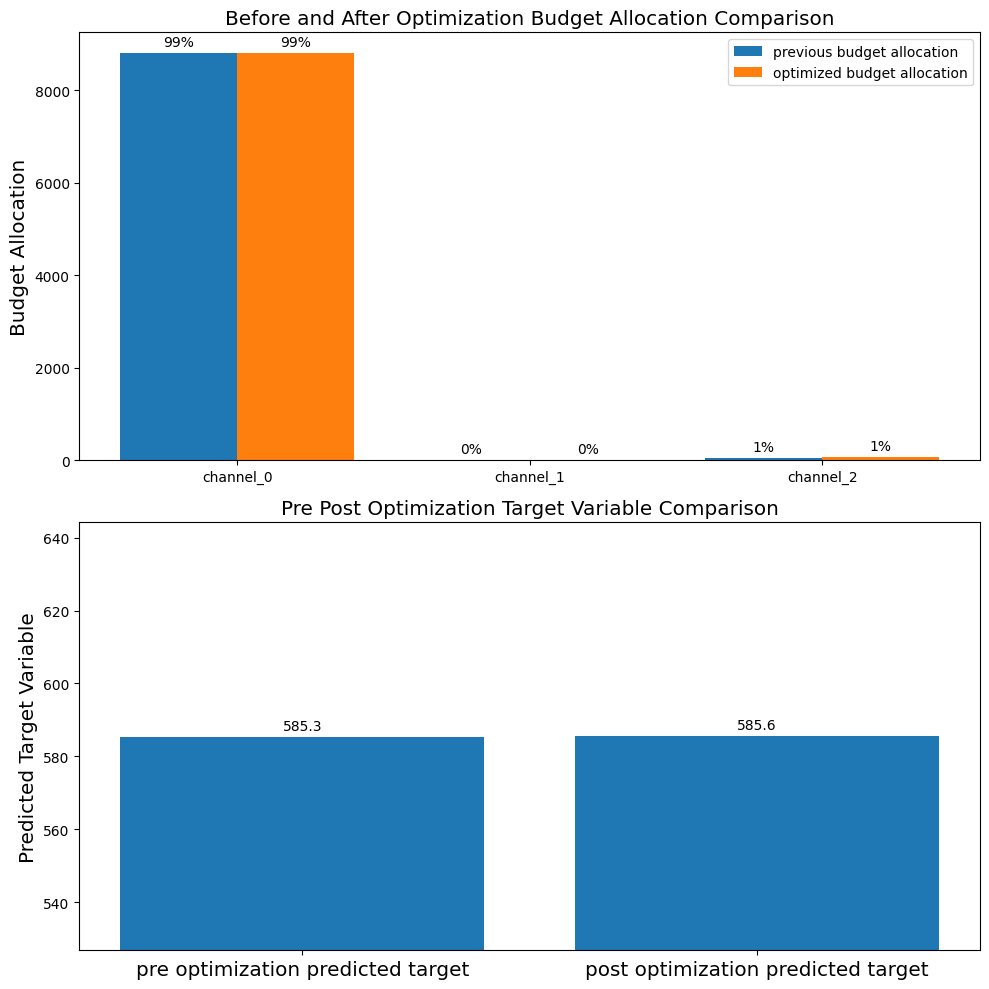

In [ ]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10))

In [ ]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.52      0.29      0.53      0.11      0.99    754.22      1.00
ad_effect_retention_rate[1]      0.55      0.29      0.56      0.12      1.00    952.45      1.00
ad_effect_retention_rate[2]      0.51      0.29      0.50      0.12      1.00    605.12      1.00
     coef_extra_features[0]     -0.00      0.00     -0.00     -0.00      0.00    865.45      1.00
     coef_extra_features[1]     -0.00      0.00     -0.00     -0.00      0.00    872.73      1.00
     coef_extra_features[2]     -0.00      0.00     -0.00     -0.00      0.00   1060.86      1.00
     coef_extra_features[3]     -0.00      0.00     -0.00     -0.01      0.00    865.01      1.00
     coef_extra_features[4]      0.09      0.14      0.08     -0.15      0.29    290.47      1.00
     coef_extra_features[5]     -0.00      0.00     -0.00     -0.00     -0.00    880.96      1.00
              coef_

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


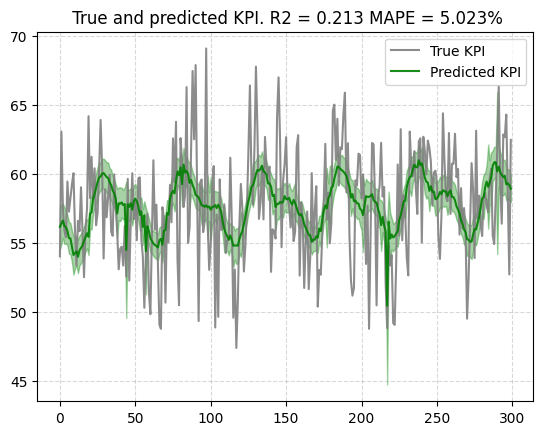

In [ ]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [ ]:
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              extra_features=extra_features_scaler.transform(extra_features_data_test),
                              seed=1)


In [ ]:
new_predictions

Array([[1.0004193 , 0.99711114, 0.99175507, ..., 1.0526665 , 1.0507251 ,
        1.0484397 ],
       [1.0243791 , 1.0167677 , 1.0180749 , ..., 1.0458483 , 1.0486026 ,
        1.033852  ],
       [1.0046469 , 1.0010087 , 1.0020039 , ..., 1.0660039 , 1.056454  ,
        1.0527309 ],
       ...,
       [0.99810845, 0.9911466 , 0.9950637 , ..., 1.0368344 , 1.0455062 ,
        1.0469058 ],
       [1.0045617 , 0.99746114, 1.0015988 , ..., 1.0456355 , 1.0546995 ,
        1.0570675 ],
       [1.025164  , 1.02735   , 1.0230955 , ..., 1.0620273 , 1.0502266 ,
        1.0402546 ]], dtype=float32)

ValueError: Input contains NaN.

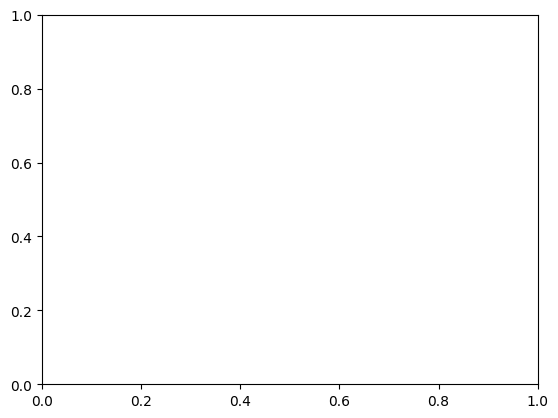

In [ ]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target_data_test))